In [236]:
# Import Library and Font Settings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

# Set Fonts
plt.rcParams['font.family'] = 'Noto Sans Kr'

# Ignore Warning
# import warnings warnings.filterwarnings('ignore')

In [238]:
# Load Data Frame and Data Info
df = sb.load_dataset('titanic')
df.info()
df.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


alive
no     549
yes    342
Name: alive, dtype: int64


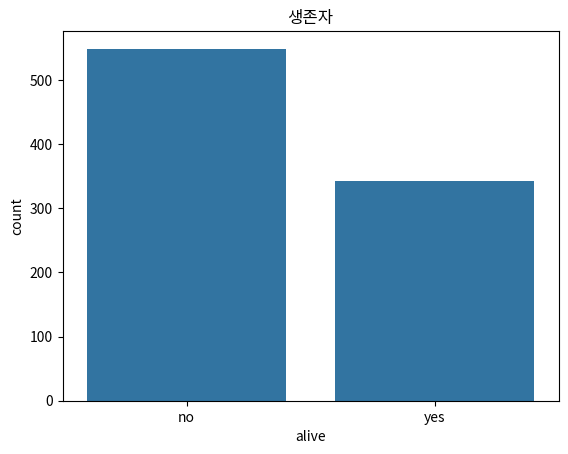

In [49]:
# Alive Data Seaborn countplot
alive_data = df.groupby('alive')['alive'].count()
print (alive_data)
sb.countplot(x = 'alive', data=df)
plt.title('생존자')
plt.show()

sex     alive
female  no        81
        yes      233
male    no       468
        yes      109
Name: alive, dtype: int64


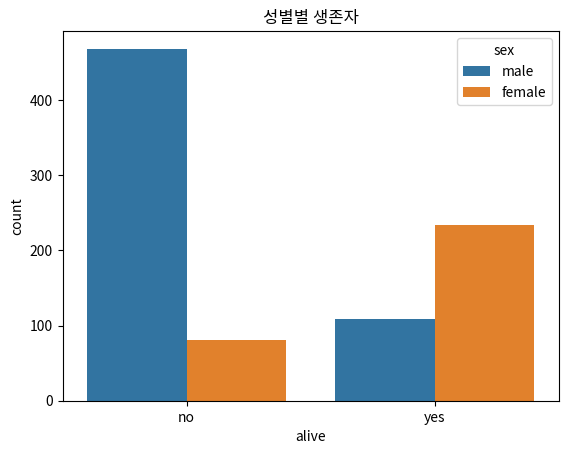

In [47]:
# Alive Data by gender countplot x, hue
alive_sex_data = df.groupby(['sex', 'alive'])['alive'].count()
print(alive_sex_data)
sb.countplot(x = 'alive', hue='sex', data = df)
plt.title('성별별 생존자')
plt.show()

In [53]:
# Survived Data mean
alive_data_mean = df[['sex', 'survived']].groupby('sex').mean()
alive_data_mean

,survived
sex,
female,0.742038
male,0.188908


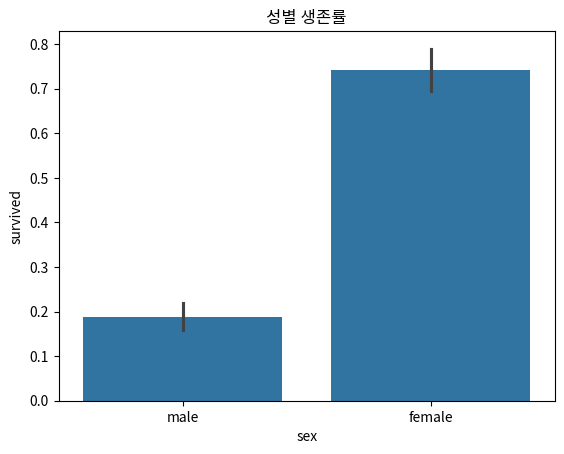

In [55]:
# Seaborn barplot
sb.barplot(x = 'sex', y='survived', data=df)
plt.title('성별 생존률')
plt.show()

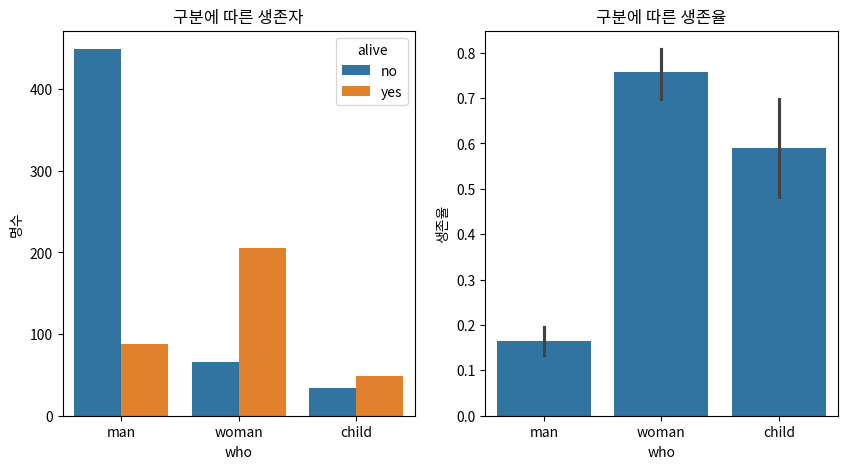

In [95]:
# Survived
fig, axs = plt.subplots(1,2, figsize=(10,5))
sb.countplot(x = 'who', hue = 'alive', ax = axs[0], data = df)
axs[0].set_title('구분에 따른 생존자')
axs[0].set_ylabel('명수')
sb.barplot(x = 'who', y = 'survived', ax = axs[1], data = df)
axs[1].set_title('구분에 따른 생존율')
axs[1].set_ylabel('생존율')
plt.show()

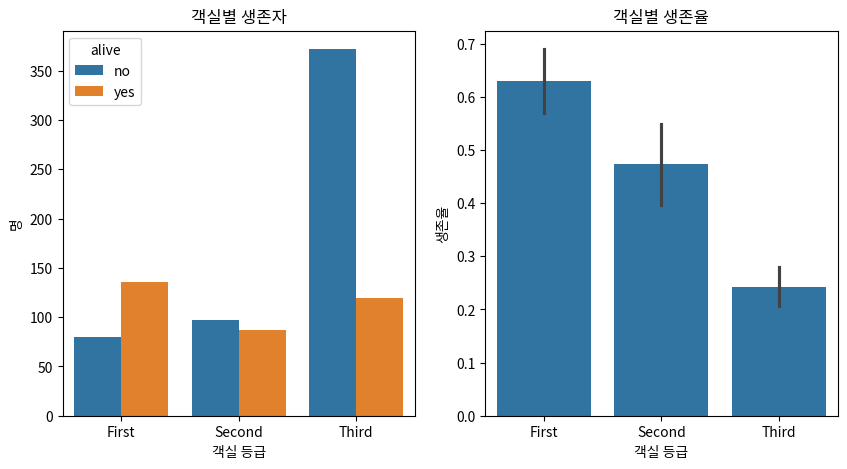

In [111]:
# Alive by class
fig, axs = plt.subplots(1,2, figsize= (10, 5))
sb.countplot(x = 'class', hue = 'alive', data = df, ax = axs[0])
axs[0].set_title('객실별 생존자')
axs[0].set_xlabel('객실 등급')
axs[0].set_ylabel('명')
sb.barplot(x = 'class', y = 'survived', data = df , ax = axs[1])
axs[1].set_title('객실별 생존율')
axs[1].set_xlabel('객실 등급')
axs[1].set_ylabel('생존율')
plt.show()

In [167]:
# Groupby class mean
df.groupby('class', observed=False)['survived'].mean()

class
First     0.629630
Second    0.472826
Third     0.242363
Name: survived, dtype: float64

In [169]:
# Groupby gender class mean
# df[['class', 'sex', 'survived']].groupby(['sex', 'class'], observed=False).mean()
df.groupby(['sex', 'class'], observed=False)['survived'].mean()

sex     class 
female  First     0.968085
        Second    0.921053
        Third     0.500000
male    First     0.368852
        Second    0.157407
        Third     0.135447
Name: survived, dtype: float64

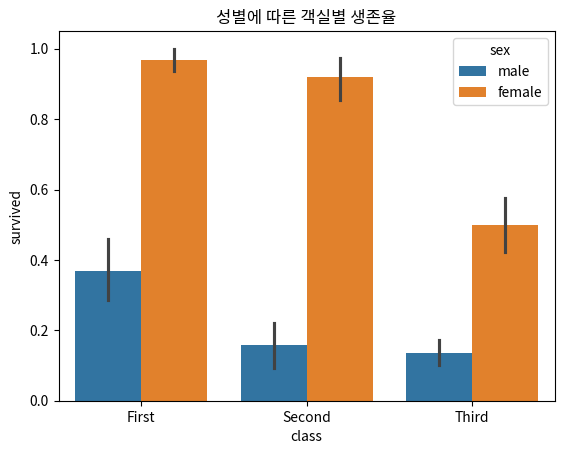

In [171]:
# Survibed by class and gender
sb.barplot(x = 'class', y = 'survived', hue = 'sex', data=df)
plt.title('성별에 따른 객실별 생존율')
plt.show()

In [177]:
# Groupby class and age
df.groupby(['class', 'who'], observed=False)['survived'].mean()

class   who  
First   child    0.833333
        man      0.352941
        woman    0.978022
Second  child    1.000000
        man      0.080808
        woman    0.909091
Third   child    0.431034
        man      0.119122
        woman    0.491228
Name: survived, dtype: float64

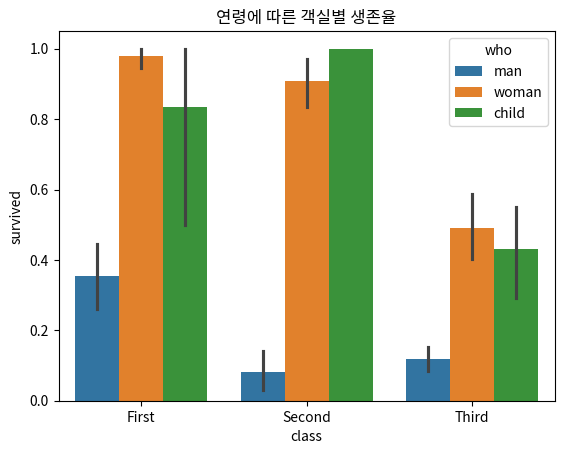

In [179]:
# Survived by class and age Graph
sb.barplot(x = 'class', y = 'survived', hue = 'who', data = df)
plt.title('연령에 따른 객실별 생존율')
plt.show()

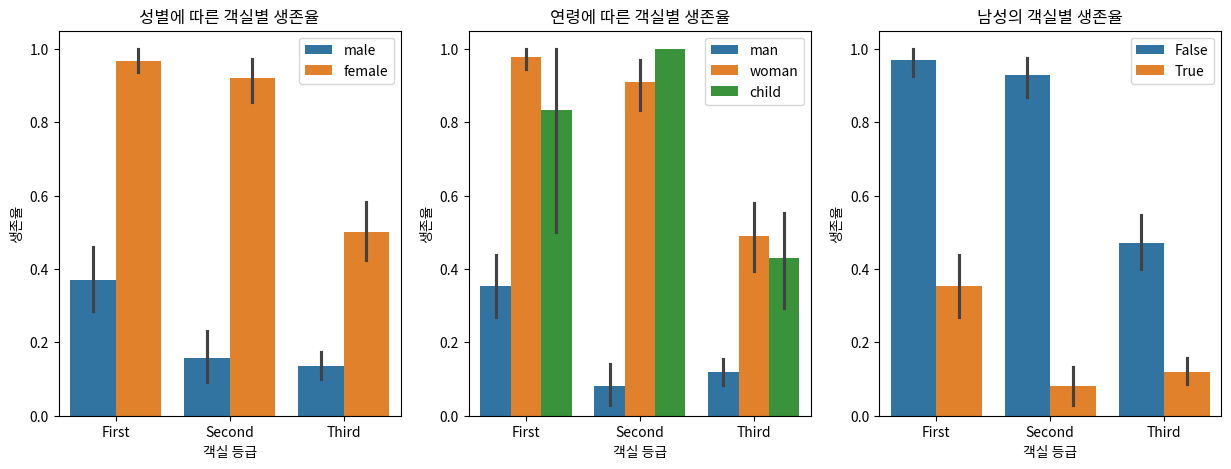

In [193]:
# Survived by class and age Subplots Graph
fig , axs = plt.subplots(1,3, figsize = (15, 5))
sb.barplot(x = 'class', y = 'survived', hue = 'sex', data = df, ax = axs[0])
axs[0].set_title('성별에 따른 객실별 생존율')
axs[0].set_xlabel('객실 등급')
axs[0].set_ylabel('생존율')
axs[0].legend()
sb.barplot(x = 'class', y = 'survived', hue = 'who', data = df, ax = axs[1])
axs[1].set_title('연령에 따른 객실별 생존율')
axs[1].set_xlabel('객실 등급')
axs[1].set_ylabel('생존율')
axs[1].legend()
sb.barplot(x = 'class', y = 'survived', hue = 'adult_male', data = df, ax = axs[2])
axs[2].set_title('남성의 객실별 생존율')
axs[2].set_xlabel('객실 등급')
axs[2].set_ylabel('생존율')
axs[2].legend()
plt.show()

In [197]:
# Check age Nan data use isna
df['age'].isna().sum()

177

In [213]:
# Get mean value by who
age_mean = df.groupby('who')['age'].mean()
print (type(age_mean), age_mean)

<class 'pandas.core.series.Series'> who
child     6.369518
man      33.173123
woman    32.000000
Name: age, dtype: float64


isnull :  0
mean :  age
0.42     1.0
0.67     1.0
0.75     1.0
0.83     1.0
0.92     1.0
        ... 
70.00    0.0
70.50    0.0
71.00    0.0
74.00    0.0
80.00    1.0
Name: survived, Length: 88, dtype: float64


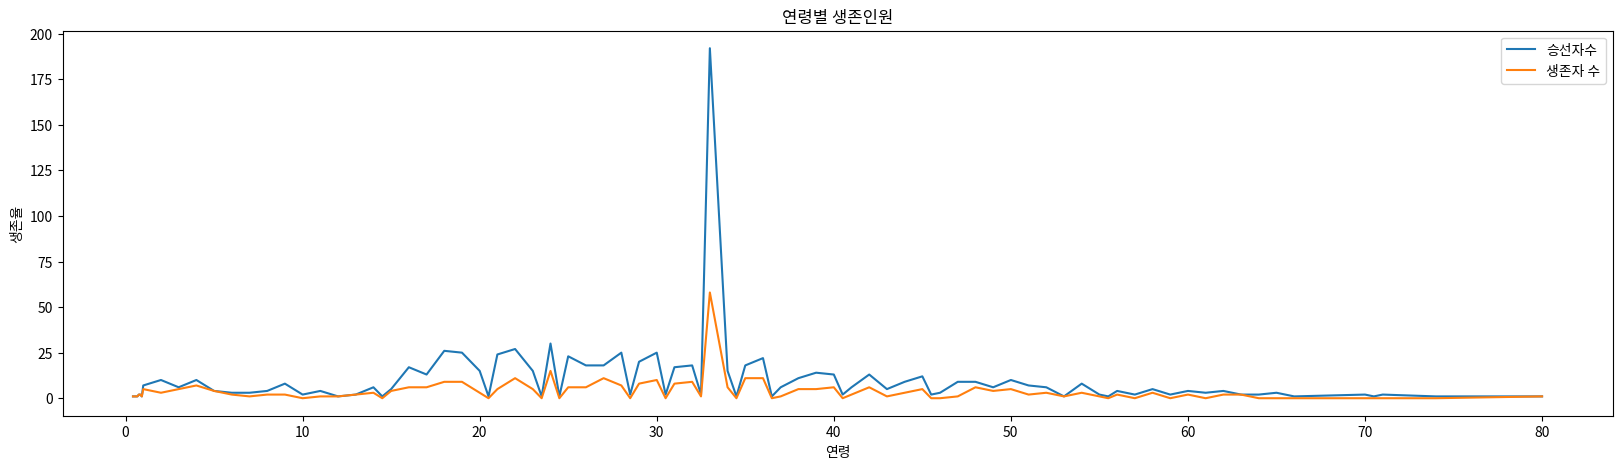

In [364]:
# Fill NaN Data
df_fixed = df.copy()
df_fixed.loc[(df_fixed['age'].isnull()) & (df_fixed['who'] == 'child'), 'age'] = 6
df_fixed.loc[(df_fixed['age'].isnull()) & (df_fixed['who'] == 'man'), 'age'] = 33
df_fixed.loc[(df_fixed['age'].isnull()) & (df_fixed['who'] == 'woman'), 'age'] = 33
print ('isnull : ', df_fixed['age'].isnull().sum())
print ('mean : ', df_fixed.groupby('age')['survived'].mean())
plt.figure(figsize = (20,5))
plt.xlabel('연령')
plt.ylabel('생존율')
plt.title('연령별 생존인원')
sb.lineplot(data=df_fixed.groupby('age')['age'].count(), label = '승선자수')
sb.lineplot(data=df_fixed.groupby('age')['survived'].sum(), label = '생존자 수')
plt.show()

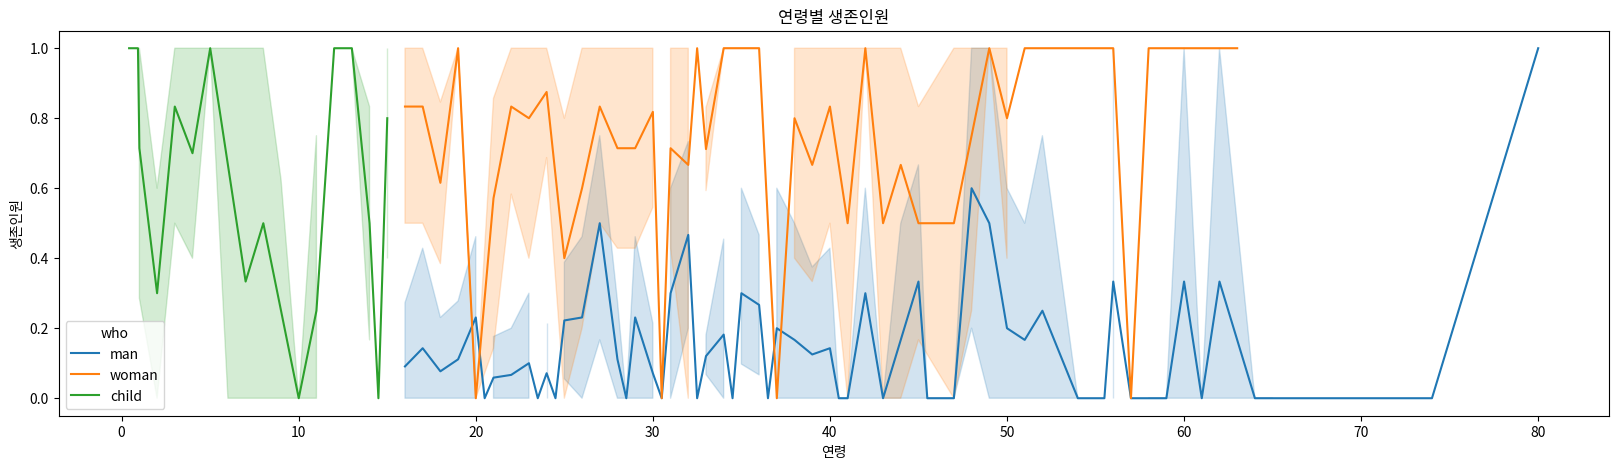

In [362]:
# Fixed Data lineplot
plt.figure(figsize = (20,5))
plt.xlabel('연령')
plt.ylabel('생존인원')
plt.title('연령별 생존인원')
sb.lineplot(x = 'age', y = 'survived', hue = 'who', data = df_fixed)
plt.show()

In [366]:
print ('최연장자 :', df_fixed['age'].max())
print ('최연소자 :', df_fixed['age'].min())
print ('평균나이 :', df_fixed['age'].mean())

최연장자 : 80.0
최연소자 : 0.42
평균나이 : 30.354848484848482


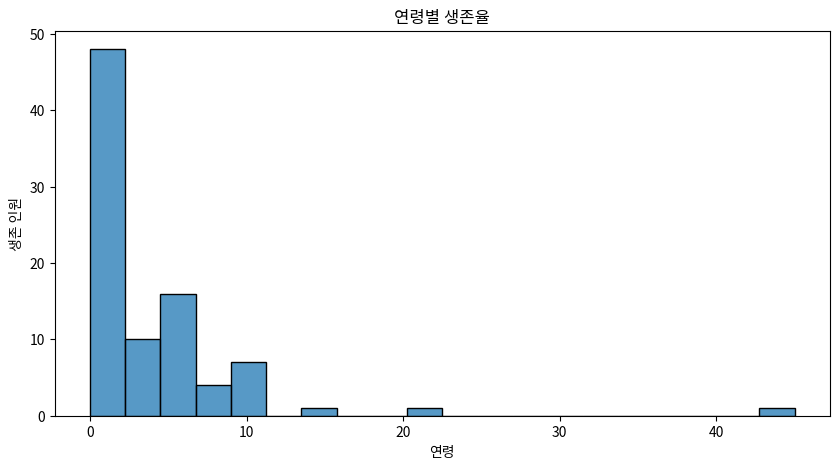

In [390]:
# Fill NaN Data
df_fixed = df.copy()
fill_values = {'child': 6 , 'man' : 33, 'woman' : 32}
df_fixed['age'] = df_fixed.groupby('who')['age'].transform(lambda x : x.fillna(fill_values[x.name]))
plt.figure(figsize = (10, 5))
plt.title('연령별 생존율')
plt.xlabel('연령')
plt.ylabel('생존 인원')
sb.histplot(data = df_fixed.groupby('age')['survived'].sum(), label = '생존자 수')
plt.show()

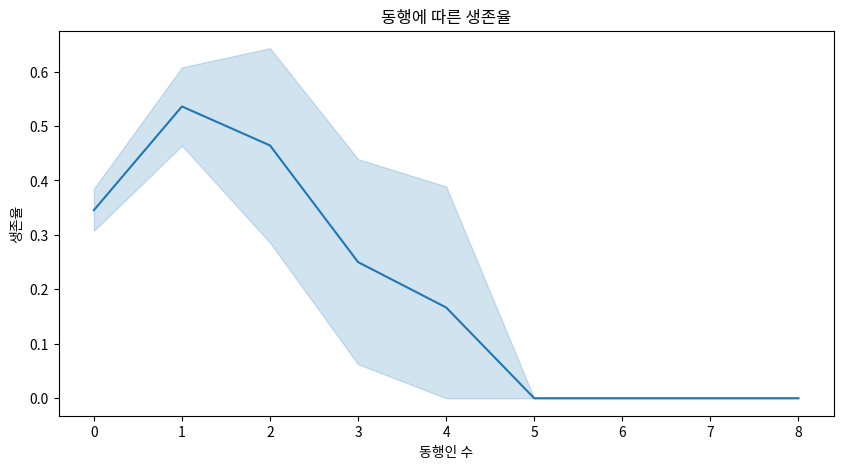

In [394]:
# Survived by sibsp, parch
plt.figure(figsize = (10, 5))
plt.title('동행에 따른 생존율')
plt.xlabel('동행인 수')
plt.ylabel('생존율')
sb.lineplot(x = 'sibsp', y = 'survived', data =df)
plt.show()